# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "../data/Mouse_metadata.csv"
study_results_path = "../data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
mice_total = study_complete["Mouse ID"].nunique()
mice_total

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = study_complete[study_complete.duplicated(["Mouse ID", "Timepoint"])]

unique_duplicate_mouse_id = duplicate_mice["Mouse ID"].unique()

result_array = np.array(unique_duplicate_mouse_id, dtype=object)
result_array

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_complete[study_complete["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = study_complete[study_complete['Mouse ID'] != 'g989']
cleaned_df.reset_index(drop=True, inplace=True)
cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
mice_total_cleaned = cleaned_df["Mouse ID"].nunique()
mice_total_cleaned

248

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
# Import necessary libraries if not already imported
summary_statistics = cleaned_df.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
})

summary_statistics.columns = [
    "Mean Tumor Volume",
    "Median Tumor Volume",
    "Tumor Volume Variance",
    "Tumor Volume Std. Dev.",
    "Tumor Volume Std. Err."
]

summary_statistics.reset_index(inplace=True)

summary_statistics


,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [14]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
regimen_grouped = cleaned_df.groupby("Drug Regimen")

summary_statistics2 = regimen_grouped["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])

summary_statistics2


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

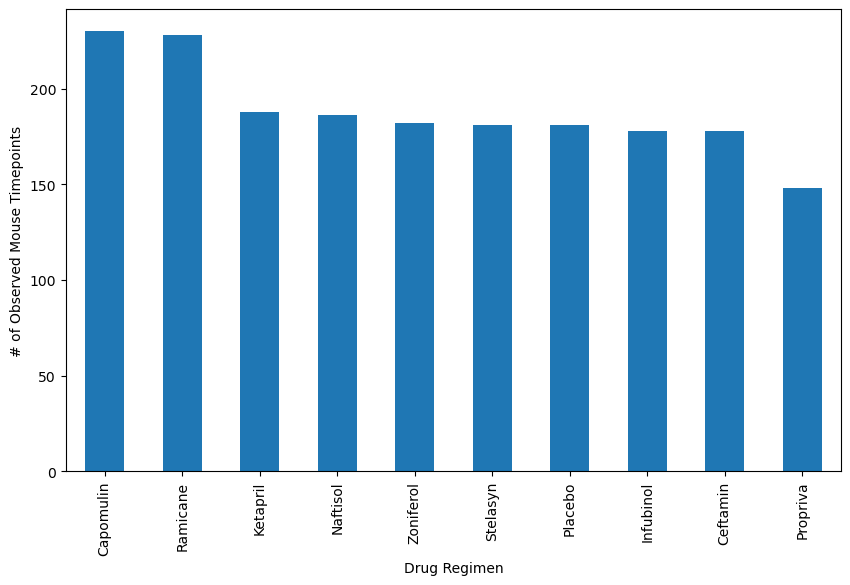

In [15]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

regimen_counts = cleaned_df["Drug Regimen"].value_counts()

regimen_counts.plot(kind="bar", figsize=(10, 6))

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

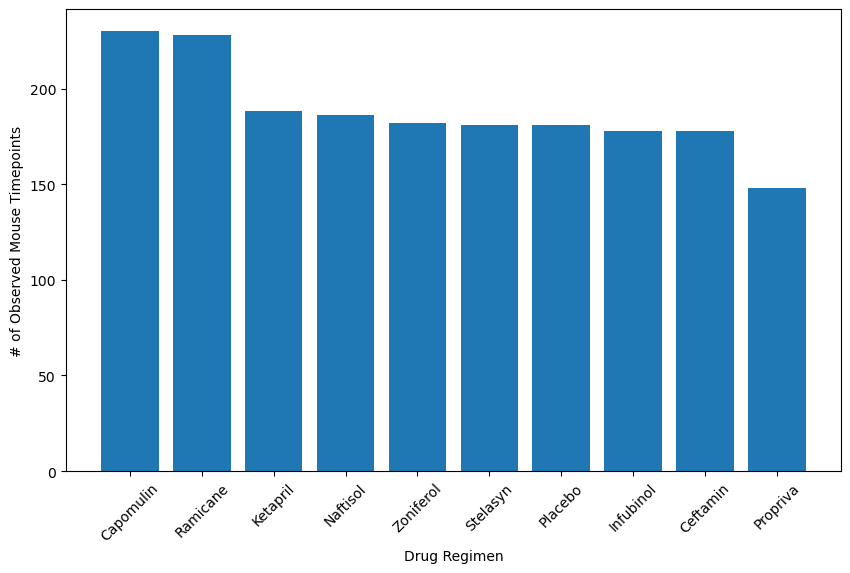

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

regimen_counts = cleaned_df["Drug Regimen"].value_counts()

regimen_names = regimen_counts.index
counts = regimen_counts.values

plt.figure(figsize=(10, 6))
plt.bar(regimen_names, counts)

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.xticks(rotation=45)

plt.show()

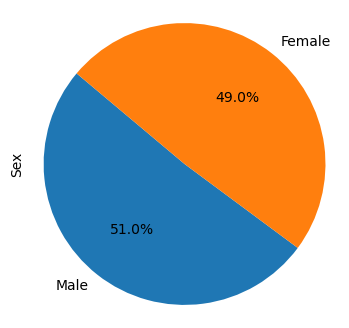

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_distribution = cleaned_df["Sex"].value_counts()

gender_distribution.plot(kind="pie", autopct="%1.1f%%", startangle=140, figsize=(4, 4))

plt.ylabel("Sex")

plt.axis('equal') 

plt.show()

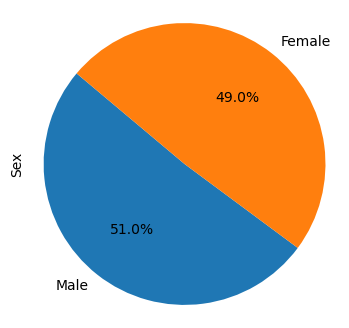

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

gender_distribution = cleaned_df["Sex"].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct="%1.1f%%", startangle=140)

plt.ylabel("Sex")

plt.axis("equal")  

plt.show()


## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
selected_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volume_df = cleaned_df[cleaned_df["Drug Regimen"].isin(selected_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
last_timepoints = final_tumor_volume_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume_df = pd.merge(last_timepoints, final_tumor_volume_df, on=["Mouse ID", "Timepoint"], how="inner")

In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = selected_regimens

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = [[] for _ in treatments_list]

# Calculate the IQR and quantitatively determine if there are any potential outliers.

grouped_data = final_tumor_volume_df.groupby(["Drug Regimen", "Mouse ID"])["Tumor Volume (mm3)"].last()

potential_outliers = []

for treatment in selected_regimens:
    
    treatment_data = grouped_data[treatment]
    
    quartiles = treatment_data.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    if not outliers.empty:
        potential_outliers.append((treatment, outliers))

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
  
    tumor_volumes_by_drug = {}

for regimen in selected_regimens:
    regimen_data = cleaned_df[cleaned_df["Drug Regimen"] == regimen]
    tumor_volumes = regimen_data['Tumor Volume (mm3)']

    tumor_volumes_by_drug = tumor_volumes

    
    # add subset: based on which criteria? 
    
    
    # Determine outliers using upper and lower bounds

outliers_by_drug = {}

for regimen, tumor_volumes in tumor_volumes_by_drug.items():
    
    tumor_volumes_series = pd.Series(tumor_volumes) #to convert this 'float' list into a series
    
    quartiles = tumor_volumes_series.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile

    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr

    outliers = tumor_volumes_series[(tumor_volumes_series < lower_bound) | (tumor_volumes_series > upper_bound)]
    if not outliers.empty:
        outliers_by_drug[regimen] = outliers.tolist()

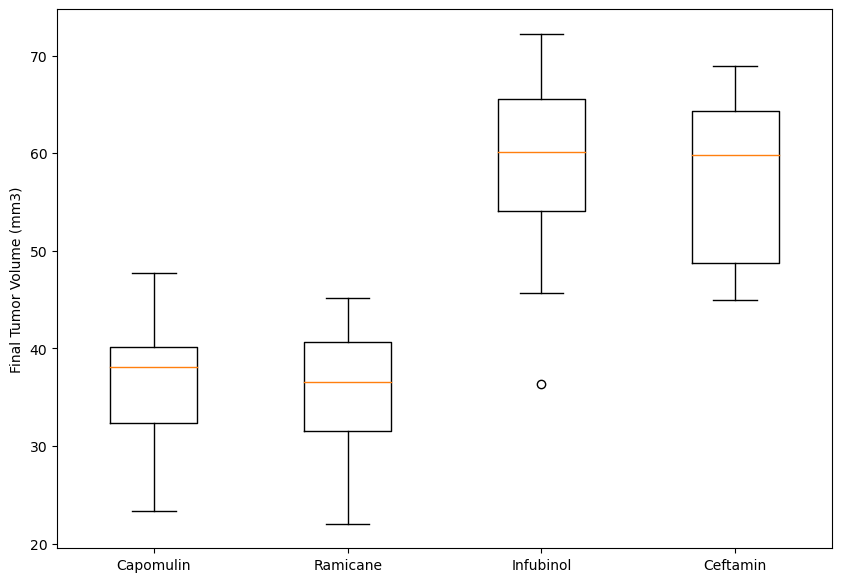

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

tumor_volumes_by_regimen = {}

for regimen in selected_regimens:
    regimen_data = final_tumor_volume_df[final_tumor_volume_df["Drug Regimen"] == regimen]
    tumor_volumes = regimen_data["Tumor Volume (mm3)"]
    tumor_volumes_by_regimen[regimen] = tumor_volumes

tumor_volumes_list = [tumor_volumes_by_regimen[regimen] for regimen in selected_regimens]

plt.figure(figsize=(10, 7))
plt.boxplot(tumor_volumes_list, labels=selected_regimens)

plt.ylabel('Final Tumor Volume (mm3)')

plt.show()


## Line and Scatter Plots

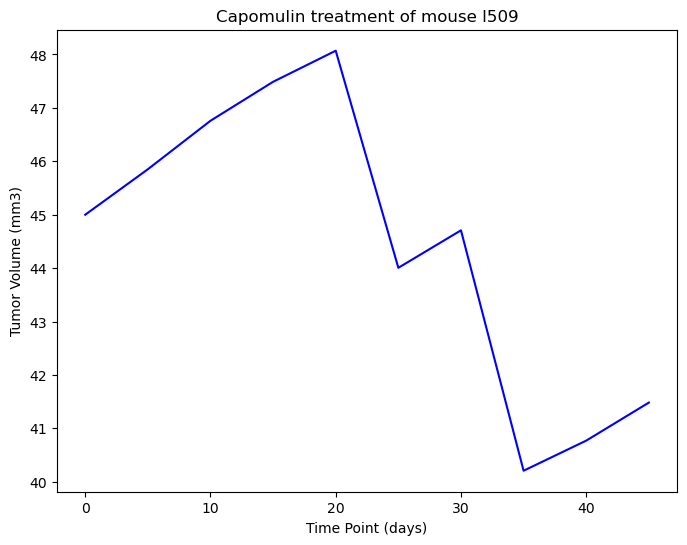

In [37]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_data = cleaned_df[cleaned_df["Drug Regimen"] == "Capomulin"]

mouse_id = "l509"
mouse_data = cleaned_df[cleaned_df["Mouse ID"] == mouse_id]

plt.figure(figsize=(8, 6))
plt.plot(mouse_data["Timepoint"], mouse_data["Tumor Volume (mm3)"], linestyle="-", color="blue")
plt.title(f"Capomulin treatment of mouse {mouse_id}")
plt.xlabel("Time Point (days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

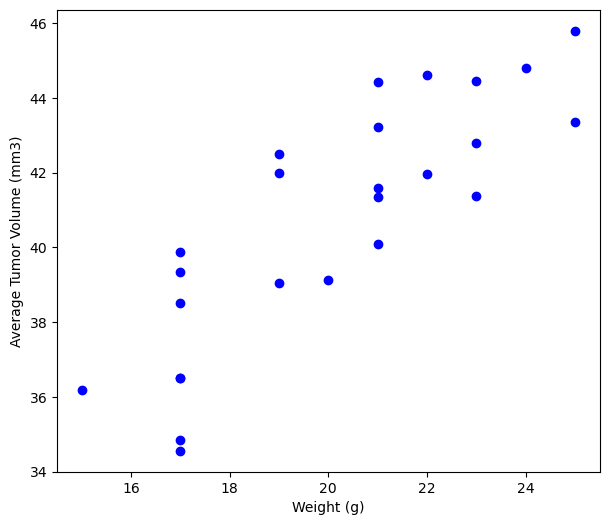

In [39]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].first()

scatter_data = pd.DataFrame({"Mouse Weight (g)": mouse_weights, "Average Tumor Volume (mm3)": average_tumor_volume})

plt.figure(figsize=(7, 6))
plt.scatter(scatter_data["Mouse Weight (g)"], scatter_data["Average Tumor Volume (mm3)"], color="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()


## Correlation and Regression

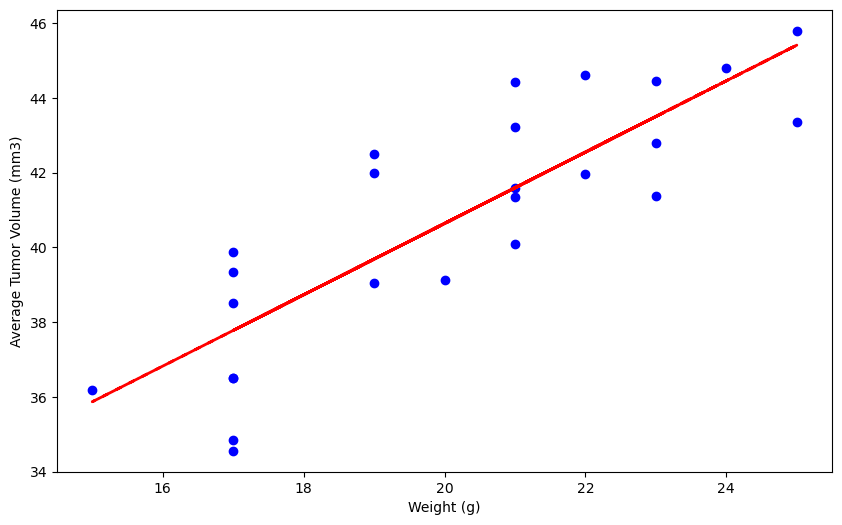

The correlation between mouse weight nd the average tumor volume is 0.84


In [43]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].first()

scatter_data = pd.DataFrame({"Mouse Weight (g)": mouse_weights, "Average Tumor Volume (mm3)": average_tumor_volume})

correlation_coefficient = scatter_data["Mouse Weight (g)"].corr(scatter_data["Average Tumor Volume (mm3)"])

x = scatter_data["Mouse Weight (g)"]
y = scatter_data["Average Tumor Volume (mm3)"]
slope = np.dot(x - x.mean(), y - y.mean()) / np.dot(x - x.mean(), x - x.mean())
intercept = y.mean() - slope * x.mean()

plt.figure(figsize=(10, 6))
plt.scatter(scatter_data["Mouse Weight (g)"], scatter_data["Average Tumor Volume (mm3)"], color="blue")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

regression_line = slope * x + intercept
plt.plot(x, regression_line, color="red", linestyle="--", linewidth=2, label="Regression Line")

plt.show()

formatted_correlation = "{:.2f}".format(correlation_coefficient)

print(f"The correlation between mouse weight nd the average tumor volume is {formatted_correlation}")
